In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [2]:
# File to Load
spotify_data = "spotify-data.csv"
# Read Spotify File and store into Pandas data frame
df = pd.read_csv(spotify_data)

In [3]:
df = df[["artist_name","track_name","streams (millions)","duration_ms", "followers"]]
df

,artist_name,track_name,streams (millions),duration_ms,followers
0,Ed Sheeran,Shape of You,"2,989",233713.0,88961926
1,The Weeknd,Blinding Lights,"2,673",200040.0,39308599
2,Tones And I,Dance Monkey,"2,425",209438.0,2888374
3,Post Malone,rockstar (feat. 21 Savage),"2,312",218147.0,35093420
4,Lewis Capaldi,Someone You Loved,"2,182",182161.0,8940823
...,...,...,...,...,...
95,benny blanco,Eastside (with Halsey & Khalid),"1,247",173800.0,849006
96,Charlie Puth,We Don't Talk Anymore (feat. Selena Gomez),"1,243",217707.0,14626796
97,Major Lazer,Cold Water (feat. Justin Bieber & MØ),"1,238",185352.0,6250081
98,OMI,Cheerleader - Felix Jaehn Remix Radio Edit,"1,235",180566.0,584717


In [4]:
#Convert Duration from milliseconds into Minutes
duration_mins = df.assign(duration_mins = (df["duration_ms"] / 1000) / 60).round(2)
duration_df = pd.merge(df, duration_mins)

In [5]:
#Clean data by removing commas and converting type
duration_df = duration_df.replace(',','', regex = True)
duration_df['streams (millions)'] = duration_df['streams (millions)'].astype(float, errors = 'raise')
duration_df

,artist_name,track_name,streams (millions),duration_ms,followers,duration_mins
0,Ed Sheeran,Shape of You,2989.0,233713.0,88961926,3.90
1,The Weeknd,Blinding Lights,2673.0,200040.0,39308599,3.33
2,Tones And I,Dance Monkey,2425.0,209438.0,2888374,3.49
3,Post Malone,rockstar (feat. 21 Savage),2312.0,218147.0,35093420,3.64
4,Lewis Capaldi,Someone You Loved,2182.0,182161.0,8940823,3.04
...,...,...,...,...,...,...
95,benny blanco,Eastside (with Halsey & Khalid),1247.0,173800.0,849006,2.90
96,Charlie Puth,We Don't Talk Anymore (feat. Selena Gomez),1243.0,217707.0,14626796,3.63
97,Major Lazer,Cold Water (feat. Justin Bieber & MØ),1238.0,185352.0,6250081,3.09
98,OMI,Cheerleader - Felix Jaehn Remix Radio Edit,1235.0,180566.0,584717,3.01


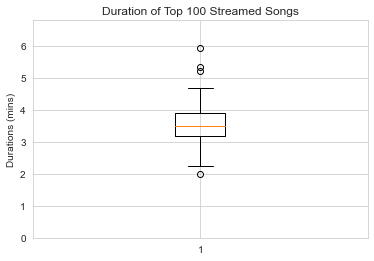

In [6]:
#The duration of a song in this dataset boxplot
sns.set_style("whitegrid")
duration_mins= duration_df['duration_mins']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Durations (mins)')
ax1.boxplot(duration_mins)
plt.ylim([0, 6.8])
ax1.set_title('Duration of Top 100 Streamed Songs')
plt.savefig('DurationBoxPlot.png')
plt.show()

In [12]:
#Descriptions for duration of the top 100 most streamed tracks
duration = duration_df['duration_mins']
quartiles = duration.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile for duration (mins) is: {lowerq}")
print(f"The upper quartile for duration (mins) is: {upperq}")
print(f"The interquartile range for duration (mins) is: {iqr}")
print(f"The median for duration (mins) is: {quartiles[0.5]} ")

duration_df[["duration_mins", "duration_ms"]].describe()

The lower quartile for duration (mins) is: 3.1750000000000003
The upper quartile for duration (mins) is: 3.905
The interquartile range for duration (mins) is: 0.7299999999999995
The median for duration (mins) is: 3.505 


,duration_mins,duration_ms
count,100.000000,100.000000
mean,3.565100,213892.100000
std,0.609367,36575.115368
min,1.990000,119133.000000
25%,3.175000,190591.500000
50%,3.505000,210452.500000
75%,3.905000,234299.750000
max,5.920000,354947.000000


R squared: 0.0002648381774532412
The r value is: 0.01627384949706864


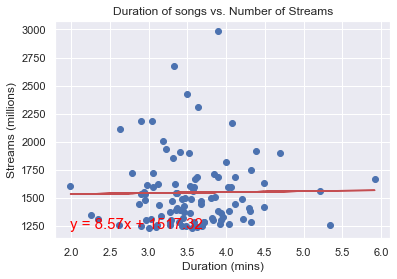

In [8]:
# plot the duration versus the streams and show r-squared value
sns.set_theme()
#  set the values
x_values = duration_df["duration_mins"]
y_values = duration_df["streams (millions)"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Add labels to the plot
plt.xlabel("Duration (mins)")
plt.ylabel("Streams (millions)")
plt.title("Duration of songs vs. Number of Streams")


# Print r square value
print(f"R squared: {rvalue**2}")
print(f"The r value is: {rvalue}")
plt.savefig('DurationvsStreams.png')
plt.show()

In [9]:
followers_df = duration_df.loc[:, ['artist_name','followers', 'streams (millions)','track_name']]
followers_df['followers'] = (followers_df['followers'] / 1000000).round(2)
followers_df

,artist_name,followers,streams (millions),track_name
0,Ed Sheeran,88.96,2989.0,Shape of You
1,The Weeknd,39.31,2673.0,Blinding Lights
2,Tones And I,2.89,2425.0,Dance Monkey
3,Post Malone,35.09,2312.0,rockstar (feat. 21 Savage)
4,Lewis Capaldi,8.94,2182.0,Someone You Loved
...,...,...,...,...
95,benny blanco,0.85,1247.0,Eastside (with Halsey & Khalid)
96,Charlie Puth,14.63,1243.0,We Don't Talk Anymore (feat. Selena Gomez)
97,Major Lazer,6.25,1238.0,Cold Water (feat. Justin Bieber & MØ)
98,OMI,0.58,1235.0,Cheerleader - Felix Jaehn Remix Radio Edit


R squared: 0.1235887511944942
The r value is: 0.3515519182062504


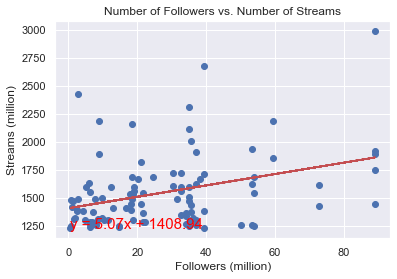

In [10]:
# plot the number of followers versus the streams and show r-squared value
sns.set_theme()
#  set the values
x_values = followers_df["followers"]
y_values = followers_df["streams (millions)"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Add labels to the plot
plt.xlabel("Followers (million)")
plt.ylabel("Streams (million)")
plt.title("Number of Followers vs. Number of Streams")


# Print r square value
print(f"R squared: {rvalue**2}")
print(f"The r value is: {rvalue}")
plt.savefig('FollowersvsStreams.png')
plt.show()

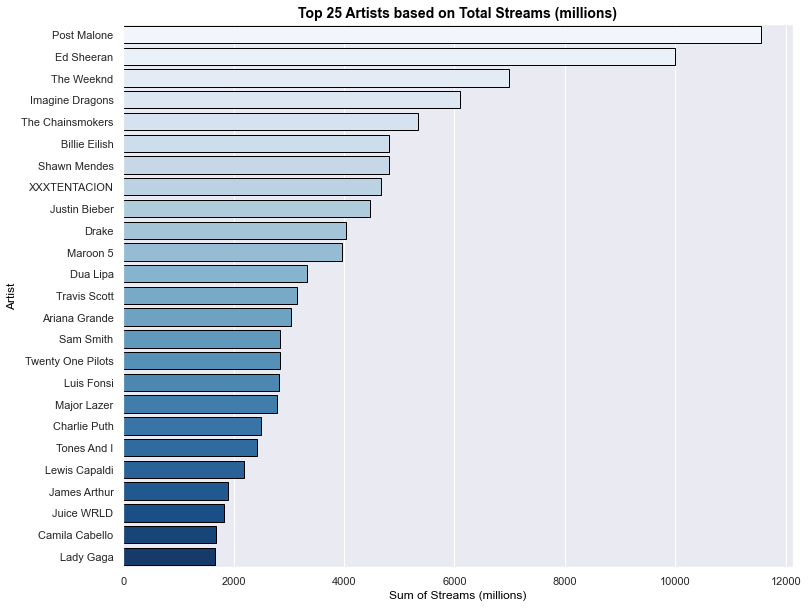

In [11]:
#How many individual artists in dataset and who is the most popular based on total streams
sns.set_theme()
duration_df['artist_name'].nunique()
fig, ax = plt.subplots(figsize = (12, 10))
top_artists = duration_df.groupby('artist_name')['streams (millions)'].sum().sort_values(ascending=False).head(25)
ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Streams (millions)', c='black', fontsize=12)
ax.set_ylabel('Artist', c='black', fontsize=12)
ax.set_title('Top 25 Artists based on Total Streams (millions)', c='black', fontsize=14, weight = 'bold')
plt.savefig('Top_25.png')
plt.show()